In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
import networkx as nx

## Create 150 by 150 Lattice Graph

In [2]:
N = 150
G = nx.grid_2d_graph(N, N)

## Sparse Laplacian Function

In [3]:
def get_laplacian(G):
    A = scipy.sparse.lil_matrix((N*N, N*N), dtype=np.float32)
    D = np.zeros((N*N), dtype=np.float32)
    for e in G.edges():
        i = np.dot(e[0], (1, N))
        j = np.dot(e[1], (1, N))
        A[i, j] = A[j, i] = 1
        D[i] += 1
        D[j] += 1
    return np.diag(D) - A

## Get Eigen Vectors

In [4]:
laplacian = get_laplacian(G)
eigval, eigvec = scipy.sparse.linalg.eigsh(laplacian, k=30, which="SM")

## Original Image

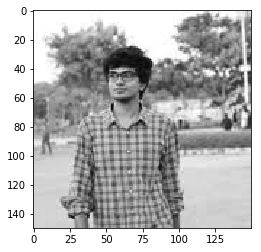

In [5]:
img = np.asarray(Image.open("picture.jpg", "r").convert("L"))
plt.imshow(np.asarray(img), cmap="gray")

## Embed Image onto Eigen Vectors and Reconstruct

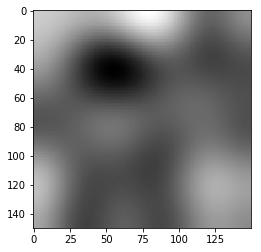

In [6]:
embedding = np.matmul(np.transpose(eigvec), img.reshape([-1, 1]))
final = np.matmul(eigvec, embedding)
plt.imshow(final[:, 0].reshape([N, N]), cmap="gray")